In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData
from NecessaryModules.splitData import split_data

In [55]:
filename = 'Dataset/ionosphere.csv'
dataset,label=getData(filename)
# dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
print(dataset)
print(label)

[[1.0, 0.0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1.0, 0.0376, 0.85243, -0.17755, 0.59755, -0.44945, 0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171, 0.41078, -0.46168, 0.21266, -0.3409, 0.42267, -0.54487, 0.18641, -0.453], [1.0, 0.0, 1.0, -0.18829, 0.93035, -0.36156, -0.10868, -0.93597, 1.0, -0.04549, 0.50874, -0.67743, 0.34432, -0.69707, -0.51685, -0.97515, 0.05499, -0.62237, 0.33109, -1.0, -0.13151, -0.453, -0.18056, -0.35734, -0.20332, -0.26569, -0.20468, -0.18401, -0.1904, -0.11593, -0.16626, -0.06288, -0.13738, -0.02447], [1.0, 0.0, 1.0, -0.03365, 1.0, 0.00485, 1.0, -0.12062, 0.88965, 0.01198, 0.73082, 0.05346, 0.85443, 0.00827, 0.54591, 0.00299, 0.83775, -0.13644, 0.75535, -0.0854, 0.70887, -0.27502, 0.43385, -0.12062, 0.57528, -0.4022, 0.58984, -0.22145, 0.431, -0.17365, 0.60436, -0.2418, 0.56045, -0.38238], [1.0, 0.0, 1.0, -0.45161, 1.0, 1.0, 0.71216, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.

# PCA implement

In [56]:
pcaTrain = PCA(n_components=10).fit(dataset)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(dataset) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X[0]))
print(compressed_dataset_X)

PCA(n_components=10)
<class 'numpy.ndarray'>
10
[[-0.85933286 -0.96140676 -0.58608236 ...  0.09554082  0.51293798
  -0.3775823 ]
 [ 0.76552441 -1.06271411 -1.39733865 ... -0.02855082  0.60080835
  -1.40271301]
 [-1.11681736 -0.39225594  0.00798828 ...  0.10397758  0.24514388
  -0.23544043]
 ...
 [-2.00968648  0.00702143  0.3456035  ...  0.01473899 -0.17882188
   0.07659244]
 [-1.87850608 -0.25826339  0.27997341 ...  0.00646042 -0.1425708
   0.06213613]
 [-1.54878315 -0.18752643  0.21757082 ...  0.13271807 -0.05099538
   0.06285422]]


In [57]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset,label)
print(len(X_train[0]))

34


In [58]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
240
[[ 2.79584392 -0.44173624  1.26894611 ... -0.3389973  -0.14148309
   0.26850532]
 [-1.33984335  1.67173906  1.27019348 ... -0.42109555  0.87265982
   0.24217891]
 [-2.0390088  -0.29822816  0.25332058 ...  0.05682242 -0.23411485
   0.0991943 ]
 ...
 [-1.9977345   0.85566408  1.57767311 ...  1.2639884   0.46256033
   0.67016158]
 [-2.23246909 -0.03263931  0.39648893 ... -0.05878898 -0.24208247
   0.0649105 ]
 [ 1.01503325  0.03270678 -0.66233053 ... -0.30842834  0.81180265
   0.26156109]]
<class 'numpy.ndarray'>
111
[[ 2.49416042 -1.12763542 -0.29788615 ...  0.38969322  0.05706835
  -0.08676997]
 [-0.69318447 -0.37011077 -0.03580672 ... -0.2617787   0.88448366
   1.46054979]
 [ 0.58186757  1.10480605 -0.0392083  ... -1.47332328  2.14680761
   0.3502265 ]
 ...
 [-1.40187913  0.84152297  0.17541582 ... -0.25174552  0.36787832
  -0.30936468]
 [ 2.53712244 -0.76728022  1.51674901 ... -0.24051823 -0.12129217
   0.13294307]
 [ 1.43655384 -0.04492988 -0.79071671 ... 

# MLP implement

In [59]:
# train the model with random parameter
from sklearn.neural_network import MLPClassifier

model_MLP = MLPClassifier(
     hidden_layer_sizes=120,
     random_state=42,
     max_iter=300,
     solver="adam"

     
     
     
        
     )

model_MLP.fit(compressed_dataset_X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=120, max_iter=300, random_state=42)

In [60]:
# Finding mean absolute error
preds = model_MLP.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.02702702702702703

In [61]:
#Use Optuna to find the best hyperparameters
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)

train_tunned= np.array(compressed_dataset_X)
target_train_tunned= np.array(label)

oof_preds= np.zeros((len(train_tunned)))
abs_error_arr=[]
def objective_MLP(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,label)):
    train_X, valid_X = train_tunned[train_index], train_tunned[val_index]
    train_Y, valid_Y = target_train_tunned[train_index], target_train_tunned[val_index]
    param={
        'hidden_layer_sizes':trial.suggest_int("hidden_layer_sizes", 150, 500),
        # solver=trial.suggest_categorical("solver", ["lbfgs", "sgd", "adam"]),
        'learning_rate':trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"]),
        'random_state':trial.suggest_int("random_state",0, 10),
        'max_iter':trial.suggest_int("max_iter",100,1000),
        'activation':trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        'batch_size':trial.suggest_int("batch_size",2,20),
        'verbose':False
    }
    model=MLPClassifier(**param)
    model.fit(train_X, train_Y)
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds # preds gives total 3846 predicted value for valid_X
 mae = mean_absolute_error(target_train_tunned, oof_preds)
 return mae

In [62]:
# this is the main optuna for optimizing a object-->"objective"
study_MLP = optuna.create_study(direction='minimize',study_name="MLP_tunning")

[I 2024-02-21 16:36:58,931] A new study created in memory with name: MLP_tunning


In [63]:

study_MLP.optimize(objective_MLP, n_trials=5) 
print('Number of finished trials:', len(study_MLP.trials))
print('Best trial:', study_MLP.best_trial.params)

[I 2024-02-21 16:37:20,292] Trial 0 finished with value: 0.09971509971509972 and parameters: {'hidden_layer_sizes': 244, 'learning_rate': 'constant', 'random_state': 7, 'max_iter': 809, 'activation': 'tanh', 'batch_size': 13}. Best is trial 0 with value: 0.09971509971509972.
[I 2024-02-21 16:37:39,850] Trial 1 finished with value: 0.08831908831908832 and parameters: {'hidden_layer_sizes': 499, 'learning_rate': 'constant', 'random_state': 3, 'max_iter': 472, 'activation': 'relu', 'batch_size': 2}. Best is trial 1 with value: 0.08831908831908832.
[I 2024-02-21 16:37:44,292] Trial 2 finished with value: 0.14245014245014245 and parameters: {'hidden_layer_sizes': 333, 'learning_rate': 'invscaling', 'random_state': 6, 'max_iter': 566, 'activation': 'logistic', 'batch_size': 20}. Best is trial 1 with value: 0.08831908831908832.
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer

Number of finished trials: 5
Best trial: {'hidden_layer_sizes': 238, 'learning_rate': 'adaptive', 'random_state': 9, 'max_iter': 712, 'activation': 'relu', 'batch_size': 12}


In [64]:
#evaluate the trial
print("Number of finished trials: ", len(study_MLP.trials))
print("Best trial:")
trial = study_MLP.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  5
Best trial:
  Value:  0.07692307692307693
  Params: 
    hidden_layer_sizes: 238
    learning_rate: adaptive
    random_state: 9
    max_iter: 712
    activation: relu
    batch_size: 12


In [65]:
# import pickle
# model_tuned=MLPClassifier(**study_MLP.best_trial.params, verbose=False)
# pickle.dump(model_tuned, open("all_pkl_file/all_tuned_model/PLC_MLP.pkl", "wb"))

In [66]:
from matplotlib import pyplot as plt
fig_study = optuna.visualization.plot_parallel_coordinate(study_MLP, params=["hidden_layer_sizes", "learning_rate","random_state","max_iter","batch_size"])
fig_study.show()

# fit tuned MLP

In [67]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

K2 = 10 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf2 = StratifiedKFold(n_splits = K2, random_state = 42, shuffle = True)

from tqdm import tqdm
train_MLP = np.array(compressed_dataset_X_train)
target_train_MLP= np.array(y_train)

test_MLP = np.array(compressed_dataset_X_test) # or test_Ada = np.array(X)


test_preds_MLP = np.zeros((len(test_MLP)))
oof_preds_MLP = np.zeros((len(train_MLP)))

for train_index, val_index in tqdm(skf2.split(compressed_dataset_X_train,y_train), total=10):
    train_X, valid_X = train_MLP[train_index], train_MLP[val_index]
    train_y, valid_y = target_train_MLP[train_index], target_train_MLP[val_index]
    ada_params = study_MLP.best_trial.params
    model_MLP_2 = MLPClassifier(**ada_params,tol=.00001,early_stopping=True) # for early_stopping
    model_MLP_2.fit(train_X, train_y)
    # for train accuracy
    preds = model_MLP_2.predict(valid_X)
    oof_preds_MLP[val_index] = preds
    # for test accuracy
    preds = model_MLP_2.predict(test_MLP)
    test_preds_MLP += (preds)/10
print(np.abs(oof_preds_MLP-target_train_MLP).mean())

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 11.86it/s]

0.1625


In [68]:
target_test_MLP = np.array(y_test)

In [69]:
from sklearn.metrics import accuracy_score
valid_Acc_MLP=accuracy_score(target_train_MLP,oof_preds_MLP)
print(valid_Acc_MLP)

# another technique for calculate test accuracy
test_Acc_MLP=accuracy_score(target_test_MLP,test_preds_MLP.round())
print(test_Acc_MLP)

0.8375
0.8738738738738738


In [70]:
train_Acc_MLP=model_MLP_2.score(compressed_dataset_X_train,y_train)
print(train_Acc_MLP)

0.85


In [71]:
test_Acc_MLP=model_MLP_2.score(compressed_dataset_X_test,y_test)
print(test_Acc_MLP)

0.8738738738738738


# Evaluation

**confusion-matrix**

In [72]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_MLP.round())
cm

array([[33,  7],
       [ 7, 64]], dtype=int64)

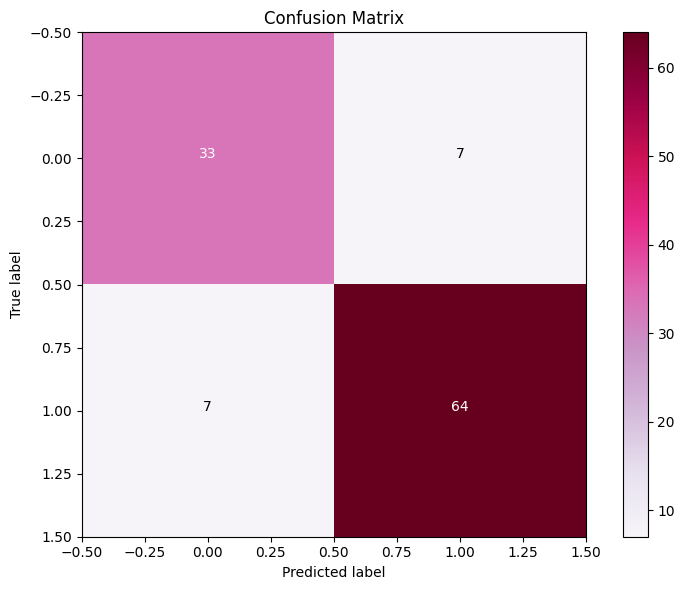

In [73]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_MLP.round())
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


**train-loss**

In [74]:
# find the losses at each iteration
# train_losses=classifier.fit(compressedDataframeTrain, y_train).loss_curve_
train_losses=model_MLP_2.loss_curve_

In [75]:
print(train_losses)
print(len(train_losses)) #384= converge at iteration 276 from max_iter 571


[0.6469469355131182, 0.5283005689455604, 0.45388009597039997, 0.401802062876228, 0.3628089310494805, 0.33152340072141484, 0.3065709567413389, 0.28505011719521484, 0.26814865785586744, 0.2524595639695451, 0.23835251551970343, 0.2248595179057952]
12


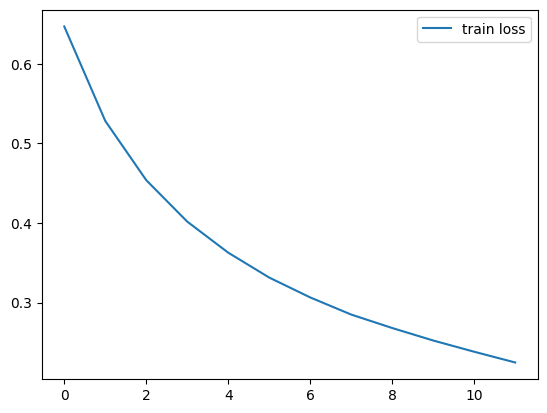

In [76]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_losses)), train_losses, label="train loss")

plt.legend()


**validation graph**

**Learning_curve********

In [77]:

compressed_dataset_X.shape

(351, 10)

In [78]:
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
################# it will take 0.8 as train data from the whole by-default ################
mlp = MLPClassifier(batch_size=11, hidden_layer_sizes=212, learning_rate='adaptive',random_state=5,max_iter=1000) #tuned MLP
train_sizes, train_scores, test_scores = learning_curve(mlp, compressed_dataset_X, label, train_sizes=np.linspace(0.1, 1.0, 5))

In [79]:
train_sizes

array([ 28,  91, 154, 217, 280])

In [80]:
train_scores # by-default 5-fold cross validation

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [81]:
test_scores

array([[0.63380282, 0.71428571, 0.74285714, 0.92857143, 0.8       ],
       [0.8028169 , 0.71428571, 0.78571429, 0.77142857, 0.82857143],
       [0.92957746, 0.8       , 0.92857143, 0.97142857, 0.88571429],
       [0.90140845, 0.87142857, 0.91428571, 0.98571429, 0.94285714],
       [0.91549296, 0.88571429, 0.92857143, 0.98571429, 0.94285714]])

In [82]:
#***** Calculate mean and standard deviation of train and test scores (as we got values for 5 fold cross in each row****)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [83]:
train_mean

array([1., 1., 1., 1., 1.])

In [84]:
train_std

array([0., 0., 0., 0., 0.])

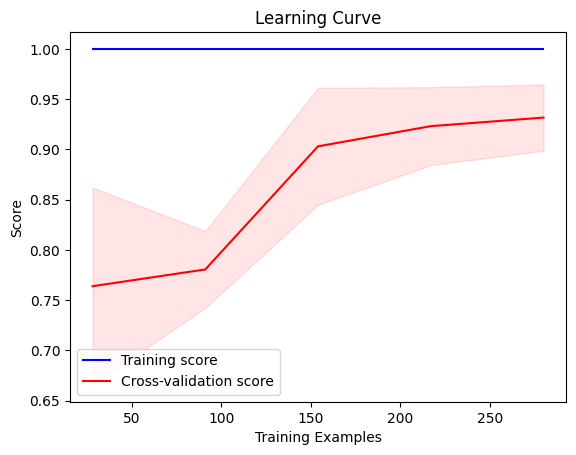

In [85]:
# Plot learning curves
plt.figure()
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1) #alpha=0.1: The transparency of the shaded region.
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

**ROC_curve*******

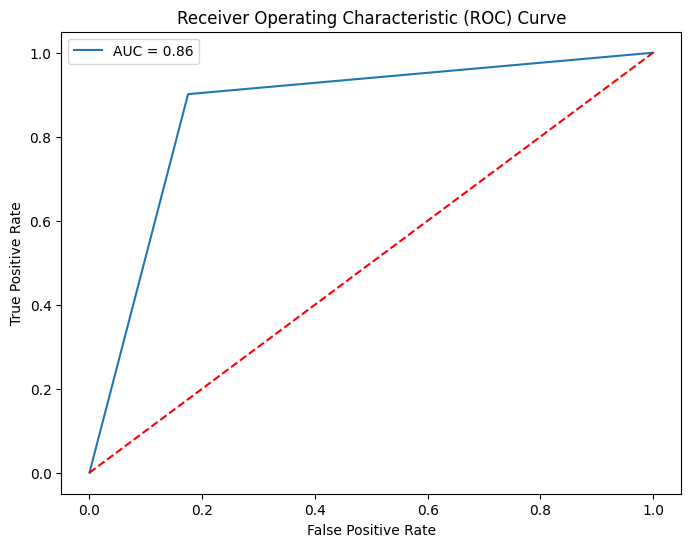

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_true contains true labels and y_scores contains predicted scores/probabilities
fpr, tpr, thresholds = roc_curve(target_test_MLP,test_preds_MLP.round())

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(target_test_MLP,test_preds_MLP.round())

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# plt.grid(True)
plt.show()


# MLP with validation and early stopping

In [87]:
from sklearn.neural_network import MLPClassifier



model=MLPClassifier(batch_size=11, hidden_layer_sizes=212, learning_rate='adaptive',
              max_iter=571, random_state=5,early_stopping=True,tol=0.0001,n_iter_no_change=10) #tuned MLP
print(model)


train_acc = model.fit(compressed_dataset_X_train, y_train).score(compressed_dataset_X_train, y_train)

test_acc=model.score(compressed_dataset_X_test,y_test)


print('train accuracy: {} \t test accuracy: {}'.format(train_acc,test_acc))



MLPClassifier(batch_size=11, early_stopping=True, hidden_layer_sizes=212,
              learning_rate='adaptive', max_iter=571, random_state=5)
train accuracy: 0.8958333333333334 	 test accuracy: 0.9009009009009009


In [88]:
train_losses_ES=model.loss_curve_
print(len(train_losses_ES)) # converse at 329 but trining stop at 68th iteration as the validation loss increases

20


In [89]:
validation_score_ES=model.validation_scores_
print(len(validation_score_ES))

20


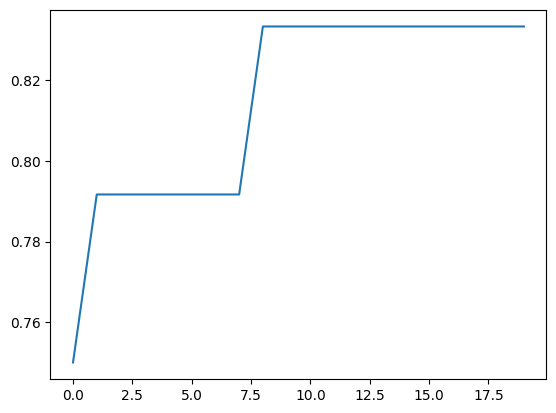

In [90]:
plt.plot(range(len(validation_score_ES)), validation_score_ES, label="validation acc")

# with pre-tuned MLP

In [91]:
# import torch
# from NecessaryModules.convert2Tensor import convert2Tensor
# from sklearn.neural_network import MLPClassifier

# # classifier =pickle.load(open("Classifier/MLP_model.pkl", "rb"))
# classifier=MLPClassifier(activation='tanh', batch_size=18, hidden_layer_sizes=158,
#               learning_rate='adaptive', max_iter=910, random_state=3,
#               solver='lbfgs')
# print(classifier)

# epoch=20
# train_A=[]
# valid_A=[]



# for i in (1,epoch):
#     train_acc = classifier.fit(compressedDataframeTrain, y_train).score(compressedDataframeTrain, y_train)
#     valid_acc=classifier.score(compressedDataframeValid,y_val)
    
#     train_A.append(train_acc)
#     valid_A.append(valid_acc)
#     # test_acc=classifier.fit(compressedDataframeTest, y_train).score(compressedDataframeTest,y_test)
#     # test_A.append(test_acc)

# # print('train accuracy: {} '.format(np.max(train_A)))
# print(train_A)
# print(valid_A)



In [92]:
# test_A=[]
# for i in (1,epoch):
#     test_acc=classifier.score(compressedDataframeTest,y_test)
#     test_A.append(test_acc)
# #
# print('test accuracy: {} '.format(np.max(test_A)))